In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('rcb').getOrCreate()

from pyspark.sql.functions import mean,min,max,col,round,mean,stddev

24/11/30 19:16:05 WARN Utils: Your hostname, Franciss-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.4.40 instead (on interface en0)
24/11/30 19:16:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
24/11/30 19:16:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Exploratory Data Analysis (EDA) is a vital initial step in data science, focusing on analyzing and visualizing datasets to understand key characteristics. It helps uncover patterns, detect outliers, and identify relationships between variables. Typically performed before formal statistical modeling, EDA lays the foundation for informed decision-making.

**Key Aspects:**
- Distribution of Data
- Outlier Detection
- Correlation Analysis
- Handling Missing Values
- Summary Statistics
- Graphical Representation

**Why EDA:**
- Understanding Data Structure
- Identifying Patterns and Relationships
- Detecting Anomalies and Outliers
- Feature Selection and Engineering

**Types:**
- **Univariate Analysis**
  - Histograms
  - Box Plots
  - Bar Charts
  - Summary Statistics
- **Bivariate Analysis**
  - Scatter Plots
  - Correlation Coefficient
- **Multivariate Analysis**
  - Pair Plots
  - PCA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('satisfaction.csv')

/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/francispaulraj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Summary of the Data Set

In [18]:
df.shape

(128577, 24)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128577 entries, 0 to 128576
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 128577 non-null  int64  
 1   satisfaction_v2                    128577 non-null  object 
 2   Gender                             128577 non-null  object 
 3   Customer Type                      128577 non-null  object 
 4   Age                                127998 non-null  float64
 5   Type of Travel                     128577 non-null  object 
 6   Class                              128577 non-null  object 
 7   Flight Distance                    128577 non-null  int64  
 8   Inflight wifi service              128577 non-null  int64  
 9   Departure/Arrival time convenient  128577 non-null  int64  
 10  Ease of Online booking             128577 non-null  int64  
 11  Gate location                      1285

### Descriptive Statistics Info

In [15]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,128577.000000,127998.000000,1.285770e+05,128577.000000,128577.000000,128577.000000,128577.000000,128242.000000,128491.000000,128577.000000,128577.00000,128577.000000,128577.000000,128472.000000,128577.000000,128577.000000,128577.000000,128577.000000,128189.000000
mean,65197.244671,39.387951,1.208985e+04,2.727175,3.056659,2.758238,2.976839,3.204621,3.254391,3.442140,3.35763,3.383879,3.352948,3.633842,3.308111,3.643365,3.286334,14.734136,15.103082
std,37526.086710,15.123203,1.043411e+06,1.328182,1.526235,1.400086,1.278176,1.329566,1.348843,1.319154,1.33407,1.286720,1.327945,1.179180,1.265404,1.176099,1.313324,38.053914,38.457181
min,1.000000,7.000000,9.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32614.000000,27.000000,4.230000e+02,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,65534.000000,40.000000,8.530000e+02,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97685.000000,51.000000,1.747000e+03,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.00000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,1.000000e+08,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,55.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [28]:
# To get column namees
for i in range(0,len(df.columns)):
    print(df.columns[i],',',end ='')

id ,satisfaction_v2 ,Gender ,Customer Type ,Age ,Type of Travel ,Class ,Flight Distance ,Inflight wifi service ,Departure/Arrival time convenient ,Ease of Online booking ,Gate location ,Food and drink ,Online boarding ,Seat comfort ,Inflight entertainment ,On-board service ,Leg room service ,Baggage handling ,Checkin service ,Inflight service ,Cleanliness ,Departure Delay in Minutes ,Arrival Delay in Minutes ,

### Check for duplicates

In [56]:
# Dublicate Records
df[df.duplicated()]

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes


### Check for null values

In [58]:
# null records
df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                  579
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                       335
Online boarding                       86
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                     105
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             388
dtype: int64

### Check for Correlation

In [77]:
# Correlation

cat_lst = []
for i in range(0,len(df.columns)):
    if df[df.columns[i]].dtype == 'object':
        cat_lst.append(df.columns[i])
    
df.drop(cat_lst,axis=1).corr()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.021329,-0.004021,-0.022501,-0.001662,0.013168,-0.000024,-0.000617,0.055480,0.052647,0.002152,0.055760,0.044461,0.074455,0.079190,0.078969,0.024573,-0.018045,-0.036218
Age,0.021329,1.000000,-0.008273,0.015189,0.036767,0.021842,-0.001040,0.024540,0.208512,0.160304,0.073666,0.055327,0.036335,-0.050283,0.033682,-0.053765,0.053248,-0.009032,-0.011270
Flight Distance,-0.004021,-0.008273,1.000000,0.002151,-0.000405,0.001864,0.000194,-0.000430,-0.003974,-0.005041,-0.001554,-0.000689,-0.002646,0.002671,-0.005417,0.000686,-0.003318,0.009849,0.008686
Inflight wifi service,-0.022501,0.015189,0.002151,1.000000,0.348296,0.717048,0.340757,0.132118,0.457655,0.121398,0.207352,0.120540,0.159316,0.121149,0.044680,0.110820,0.131057,-0.015239,-0.017227
Departure/Arrival time convenient,-0.001662,0.036767,-0.000405,0.348296,1.000000,0.440523,0.448095,0.000652,0.073562,0.008506,-0.008149,0.067082,0.009880,0.070491,0.090566,0.071921,0.009926,0.001556,-0.000089
Ease of Online booking,0.013168,0.021842,0.001864,0.717048,0.440523,1.000000,0.460438,0.030650,0.404596,0.029182,0.046728,0.039109,0.107551,0.039290,0.009494,0.035637,0.015881,-0.004940,-0.006543
Gate location,-0.000024,-0.001040,0.000194,0.340757,0.448095,0.460438,1.000000,-0.002512,0.003066,0.003227,0.002933,-0.029602,-0.004701,0.000735,-0.039317,0.000129,-0.005482,0.006287,0.006082
Food and drink,-0.000617,0.024540,-0.000430,0.132118,0.000652,0.030650,-0.002512,1.000000,0.234555,0.575654,0.622371,0.057863,0.033250,0.036063,0.085587,0.036385,0.657044,-0.028952,-0.031567
Online boarding,0.055480,0.208512,-0.003974,0.457655,0.073562,0.404596,0.003066,0.234555,1.000000,0.419896,0.284201,0.155287,0.123091,0.084954,0.205954,0.075180,0.329850,-0.019529,-0.022923
Seat comfort,0.052647,0.160304,-0.005041,0.121398,0.008506,0.029182,0.003227,0.575654,0.419896,1.000000,0.612250,0.131385,0.104665,0.075747,0.190881,0.069958,0.679842,-0.028261,-0.030874


<AxesSubplot:>

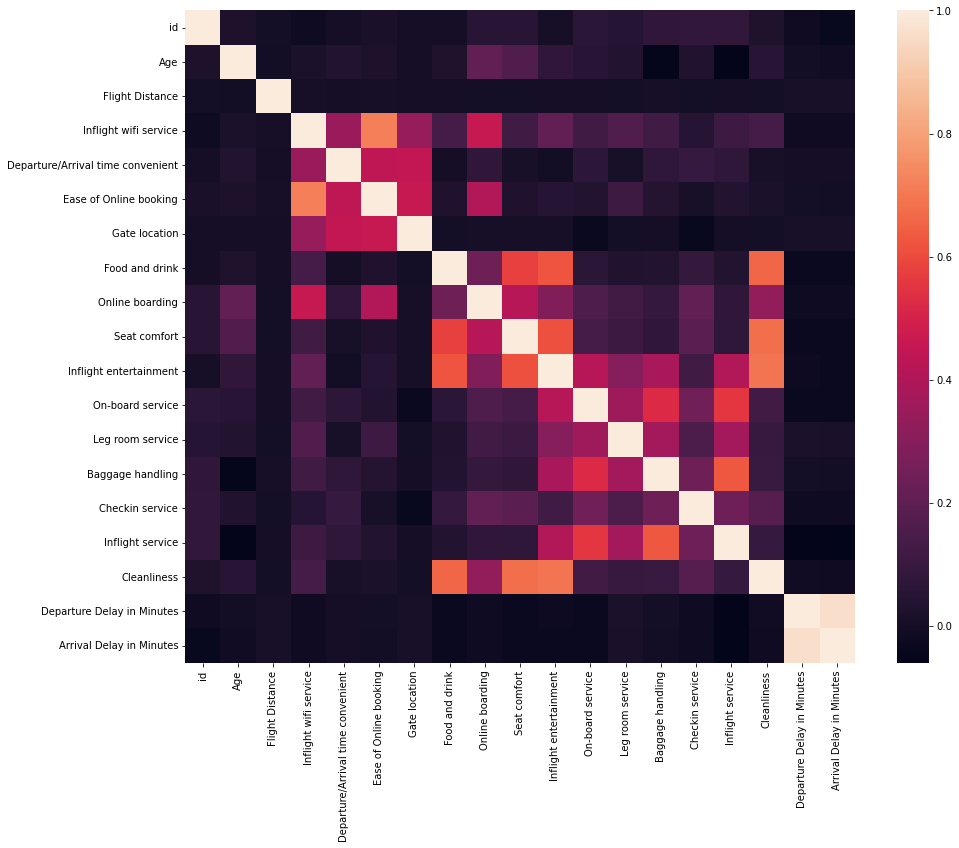

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,12))
sns.heatmap(df.drop(cat_lst,axis=1).corr())

### Find highly correlated numerical features

In [98]:
# To find highly correlated Numerical features
high_corr = df.drop(cat_lst,axis=1).corr()

highly_correlated = high_corr[(high_corr > 0.9) & (high_corr != 1.0)]
print(highly_correlated)

                                   id  Age  Flight Distance  \
id                                NaN  NaN              NaN   
Age                               NaN  NaN              NaN   
Flight Distance                   NaN  NaN              NaN   
Inflight wifi service             NaN  NaN              NaN   
Departure/Arrival time convenient NaN  NaN              NaN   
Ease of Online booking            NaN  NaN              NaN   
Gate location                     NaN  NaN              NaN   
Food and drink                    NaN  NaN              NaN   
Online boarding                   NaN  NaN              NaN   
Seat comfort                      NaN  NaN              NaN   
Inflight entertainment            NaN  NaN              NaN   
On-board service                  NaN  NaN              NaN   
Leg room service                  NaN  NaN              NaN   
Baggage handling                  NaN  NaN              NaN   
Checkin service                   NaN  NaN             

In [54]:
for i in range(0,len(df.columns)):
    #print(df[df.columns[i]].dtype)
    if df[df.columns[i]].max() == 5:
        print(df.columns[i])

Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Baggage handling
Checkin service
Inflight service
Cleanliness


In [104]:
df.Cleanliness.value_counts()

Cleanliness
4    33618
3    30376
5    28119
2    19901
1    16550
0       13
Name: count, dtype: int64

In [108]:
df['Departure/Arrival time convenient'].value_counts()

Departure/Arrival time convenient
4    31536
5    27682
3    22168
2    21362
1    19234
0     6595
Name: count, dtype: int64

### Check for imbalance data set

In [114]:
# check for imbalance data set
for i in range(0,len(df.columns)):
    print(df[df.columns[i]].value_counts())

id
1         1
86967     1
86980     1
86979     1
86978     1
         ..
43519     1
43518     1
43517     1
43516     1
129880    1
Name: count, Length: 128577, dtype: int64
satisfaction_v2
neutral or dissatisfied    72716
satisfied                  55861
Name: count, dtype: int64
Gender
Female    65238
Male      63339
Name: count, dtype: int64
Customer Type
Loyal Customer       105036
disloyal Customer     23541
Name: count, dtype: int64
Age
39.0    3625
25.0    3482
40.0    3163
44.0    3064
41.0    3042
        ... 
76.0      59
74.0      58
79.0      52
78.0      43
85.0      21
Name: count, Length: 75, dtype: int64
Type of Travel
Business travel    88830
Personal Travel    39747
Name: count, dtype: int64
Class
Business    61821
Eco         57495
Eco Plus     9261
Name: count, dtype: int64
Flight Distance
337     841
594     505
404     480
862     473
2475    470
       ... 
1469      1
681       1
1361      1
1122      1
1051      1
Name: count, Length: 3806, dtype: int64
Infl

### Box Plot for IQR and Outlier - Numeric

<AxesSubplot:>

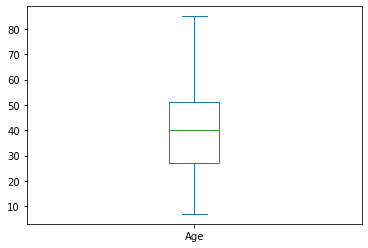

In [129]:
df['Age'].plot(kind='box')

<AxesSubplot:>

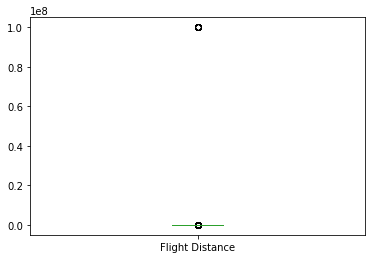

In [130]:
df['Flight Distance'].plot(kind='box')

<AxesSubplot:>

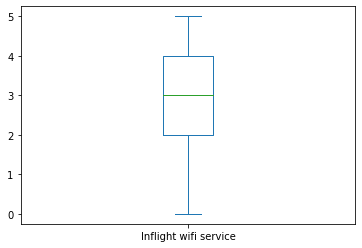

In [128]:
df['Inflight wifi service'].plot(kind='box')

<AxesSubplot:>

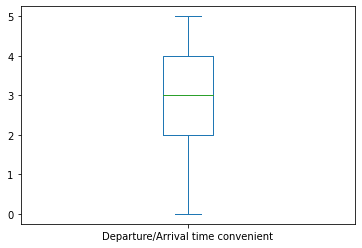

In [133]:
df['Departure/Arrival time convenient'].plot(kind='box')

<AxesSubplot:>

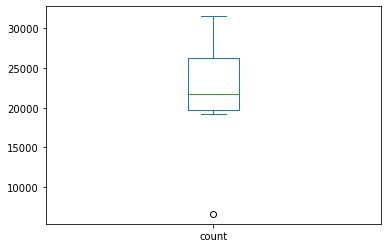

In [134]:
df['Departure/Arrival time convenient'].value_counts().plot(kind='box')

<AxesSubplot:>

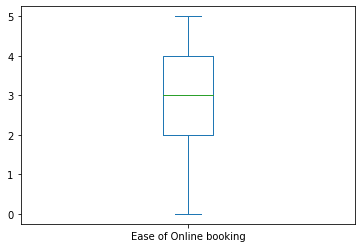

In [135]:
df['Ease of Online booking'].plot(kind='box')

<AxesSubplot:>

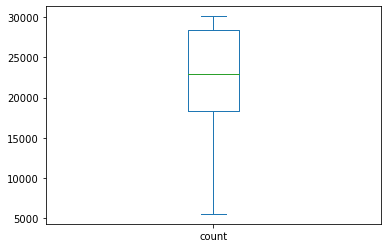

In [136]:
df['Ease of Online booking'].value_counts().plot(kind='box')

<AxesSubplot:>

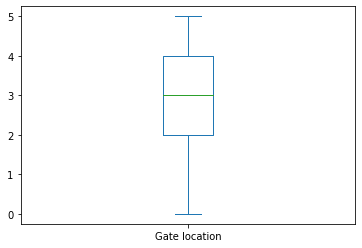

In [137]:
df['Gate location'].plot(kind='box')

<AxesSubplot:>

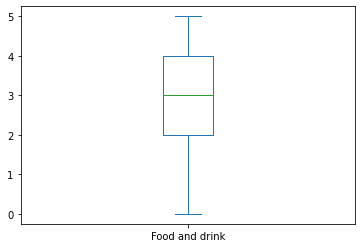

In [144]:
df['Food and drink'].plot(kind='box')

<AxesSubplot:>

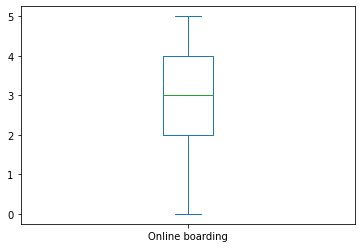

In [140]:
df['Online boarding'].plot(kind='box')

<AxesSubplot:>

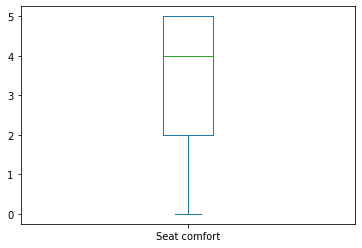

In [141]:
df['Seat comfort'].plot(kind='box')

<AxesSubplot:>

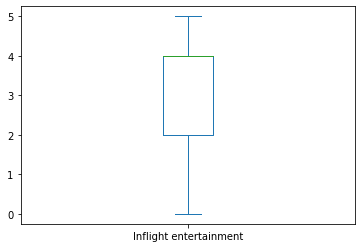

In [142]:
df['Inflight entertainment'].plot(kind='box')

<AxesSubplot:>

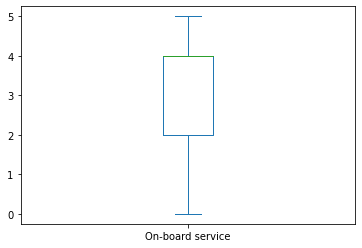

In [143]:
df['On-board service'].plot(kind='box')

<AxesSubplot:>

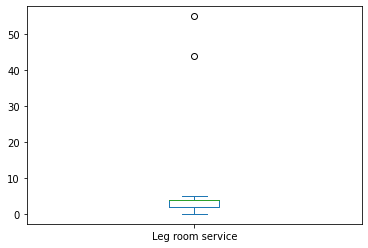

In [146]:
df['Leg room service'].plot(kind='box')

<AxesSubplot:>

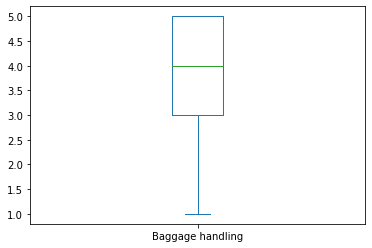

In [147]:
df['Baggage handling'].plot(kind='box')

<AxesSubplot:>

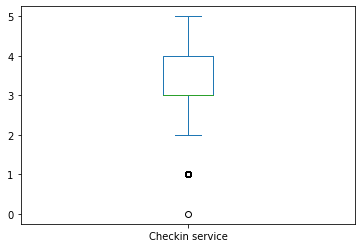

In [148]:
df['Checkin service'].plot(kind='box')

<AxesSubplot:>

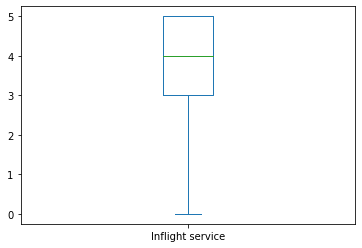

In [149]:
df['Inflight service'].plot(kind='box')

<AxesSubplot:>

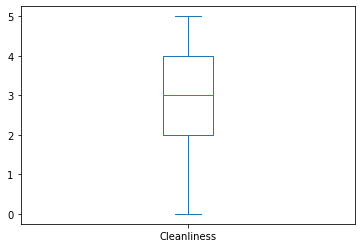

In [150]:
df['Cleanliness'].plot(kind='box')

<AxesSubplot:>

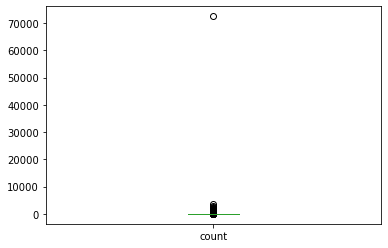

In [152]:
df['Departure Delay in Minutes'].value_counts().plot(kind='box')

<AxesSubplot:>

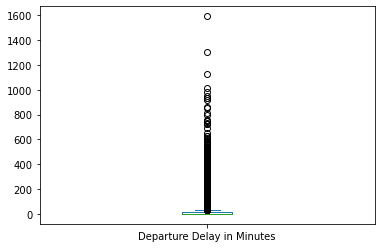

In [153]:
df['Departure Delay in Minutes'].plot(kind='box')

<AxesSubplot:>

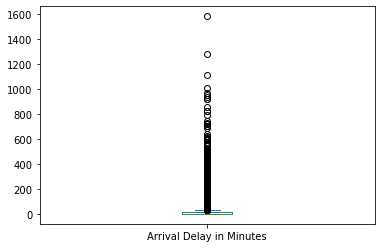

In [155]:
df['Arrival Delay in Minutes'].plot(kind='box')

<AxesSubplot:>

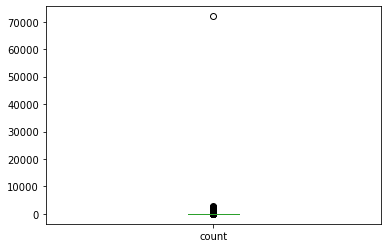

In [156]:
df['Arrival Delay in Minutes'].value_counts().plot(kind='box')

### Outlier and NaN colums indepth analysis

In [5]:
lst_nan = ['Age','Food and drink', 'Online boarding', 'Baggage handling','Arrival Delay in Minutes','Departure Delay in Minutes']

for i in range(0,len(lst_nan)):
    col = lst_nan[i]
    mean = round(df[lst_nan[i]].mean(),2)
    median = round(df[lst_nan[i]].median(),2)
    mode = df[lst_nan[i]].mode()
    print(f"{col}:  Mean {mean}, Median {median}, Mode {', '.join(map(str, mode))}")

Age:  Mean 39.39, Median 40.0, Mode 39.0
Food and drink:  Mean 3.2, Median 3.0, Mode 4.0
Online boarding:  Mean 3.25, Median 3.0, Mode 4.0
Baggage handling:  Mean 3.63, Median 4.0, Mode 4.0
Arrival Delay in Minutes:  Mean 15.1, Median 0.0, Mode 0.0
Departure Delay in Minutes:  Mean 14.73, Median 0.0, Mode 0


### Bar Chart - Catagorical

<AxesSubplot:xlabel='satisfaction_v2'>

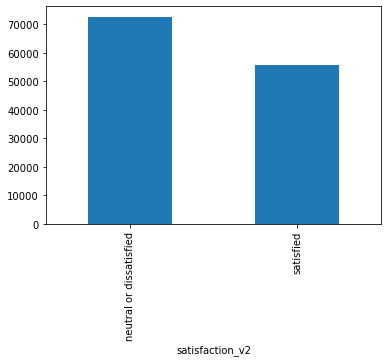

In [157]:

df['satisfaction_v2'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Gender'>

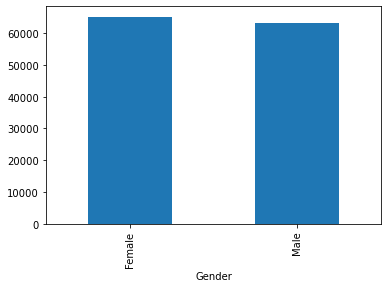

In [158]:
df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Type of Travel'>

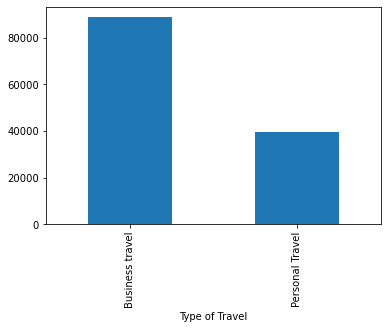

In [160]:
df['Type of Travel'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Class'>

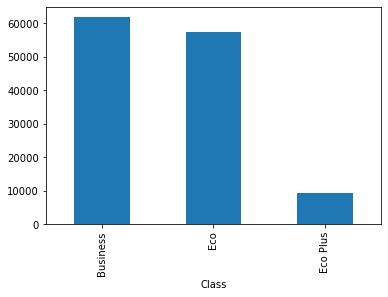

In [161]:
df['Class'].value_counts().plot(kind='bar')

### Distribution of colums

<AxesSubplot:xlabel='Inflight entertainment', ylabel='Count'>

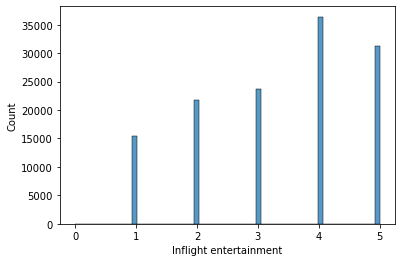

In [173]:
sns.histplot(df['Inflight entertainment'])

In [ ]:
sns.histplot(df['Departure Delay in Minutes'])

In [ ]:
sns.histplot(df['Arrival Delay in Minutes'])

In [ ]:
sns.histplot(df['Departure/Arrival time convenient (less in lowerbound)'])

### Univariate, Bivariate, Multivariate Analysis

In [3]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
sns.pairplot(df)

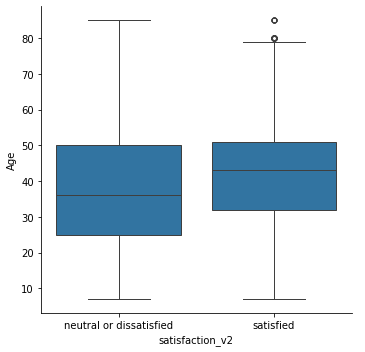

In [4]:
sns.catplot(x = 'satisfaction_v2',y='Age',data=df,kind = 'box')

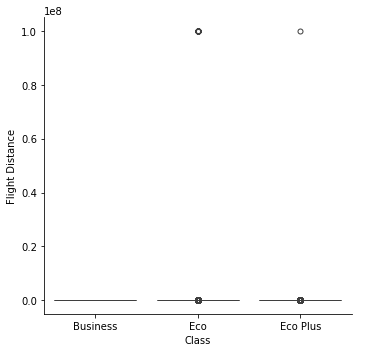

In [6]:
sns.catplot(x = 'Class',y='Flight Distance',data=df,kind = 'box')

<AxesSubplot:xlabel='Age', ylabel='Flight Distance'>

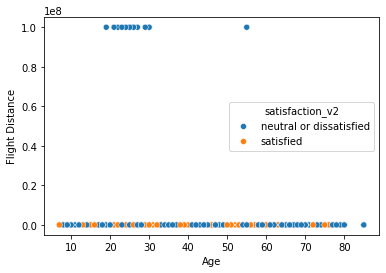

In [12]:
sns.scatterplot(x = 'Age',y = 'Flight Distance', hue = 'satisfaction_v2',data = df )

<AxesSubplot:xlabel='Age', ylabel='Flight Distance'>

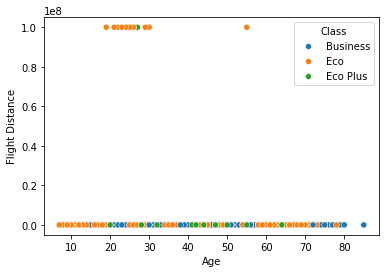

In [13]:
sns.scatterplot(x = 'Age',y = 'Flight Distance', hue = 'Class',data = df )

<AxesSubplot:xlabel='Age', ylabel='Flight Distance'>

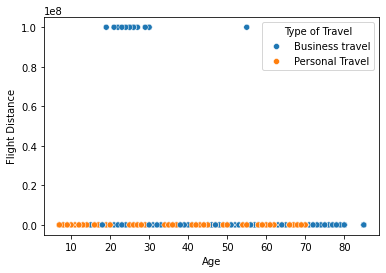

In [17]:
sns.scatterplot(x = 'Age',y = 'Flight Distance', hue = 'Type of Travel',data = df )

In [39]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !='object']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='object']

print(f'We have {len(numeric_features)} Numerial Feature, and they are \n{numeric_features}' )
print(f'\nWe have {len(categorical_features)} Categorical Feature, and they are \n{categorical_features}' )

We have 19 Numerial Feature, and they are 
['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

We have 5 Categorical Feature, and they are 
['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


In [31]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-----------------------------------')

satisfaction_v2
neutral or dissatisfied    56.554438
satisfied                  43.445562
Name: proportion, dtype: float64
-----------------------------------
Gender
Female    50.738468
Male      49.261532
Name: proportion, dtype: float64
-----------------------------------
Customer Type
Loyal Customer       81.691127
disloyal Customer    18.308873
Name: proportion, dtype: float64
-----------------------------------
Type of Travel
Business travel    69.087006
Personal Travel    30.912994
Name: proportion, dtype: float64
-----------------------------------
Class
Business    48.080916
Eco         44.716396
Eco Plus     7.202688
Name: proportion, dtype: float64
-----------------------------------


In [44]:
numeric_features = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in numeric_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-----------------------------------')

Age
39.0    2.832076
25.0    2.720355
40.0    2.471132
44.0    2.393787
41.0    2.376600
          ...   
76.0    0.046094
74.0    0.045313
79.0    0.040626
78.0    0.033594
85.0    0.016407
Name: proportion, Length: 75, dtype: float64
-----------------------------------
Flight Distance
337     0.654083
594     0.392761
404     0.373317
862     0.367873
2475    0.365540
          ...   
1469    0.000778
681     0.000778
1361    0.000778
1122    0.000778
1051    0.000778
Name: proportion, Length: 3806, dtype: float64
-----------------------------------
Inflight wifi service
2    24.917365
3    24.826369
4    19.028287
1    17.214587
5    11.015189
0     2.998203
Name: proportion, dtype: float64
-----------------------------------
Departure/Arrival time convenient
4    24.526937
5    21.529511
3    17.241031
2    16.614169
1    14.959130
0     5.129222
Name: proportion, dtype: float64
-----------------------------------
Ease of Online booking
3    23.425652
2    23.175218
4    18.815962


### Propotion of count of categorical

/var/folders/w1/5x7mg9w96sdb1jf3cwpzcq7r0000gn/T/ipykernel_3217/2218843364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[categorical_features[i]],palette='Set2')
/var/folders/w1/5x7mg9w96sdb1jf3cwpzcq7r0000gn/T/ipykernel_3217/2218843364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[categorical_features[i]],palette='Set2')
/var/folders/w1/5x7mg9w96sdb1jf3cwpzcq7r0000gn/T/ipykernel_3217/2218843364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[categorical_features[i]],palette='Set2')
/var/folders/w1/5x7mg9

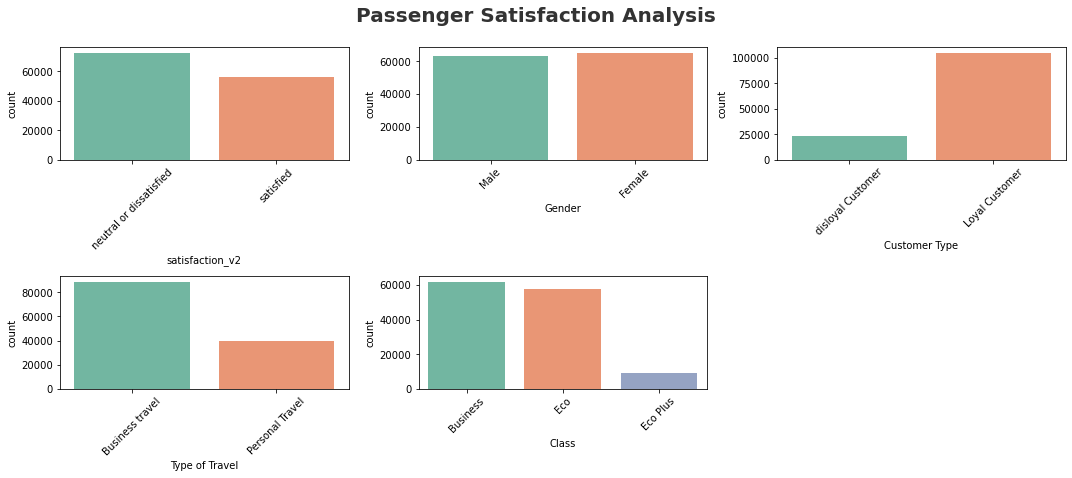

In [38]:
plt.figure(figsize=(15,15))
plt.suptitle('Passenger Satisfaction Analysis',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(categorical_features)):
    plt.subplot(5,3,i+1)
    sns.countplot(x=df[categorical_features[i]],palette='Set2')
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Propotion of cout of Numerical Feature

/var/folders/w1/5x7mg9w96sdb1jf3cwpzcq7r0000gn/T/ipykernel_3217/2540750628.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True,color='r')
/var/folders/w1/5x7mg9w96sdb1jf3cwpzcq7r0000gn/T/ipykernel_3217/2540750628.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True,color='r')
/var/folders/w1/5x7mg9w96sdb1jf3cwpzcq7r0000gn/T/ipykernel_3217/2540750628.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True,color='r')
/var/folders/w1/5x7mg9w96sdb1jf3cwpzcq7r0000gn/T/ipykernel_3217/2540750628.py:8: FutureWarning: 

`shad

ValueError: num must be 1 <= num <= 15, not 16

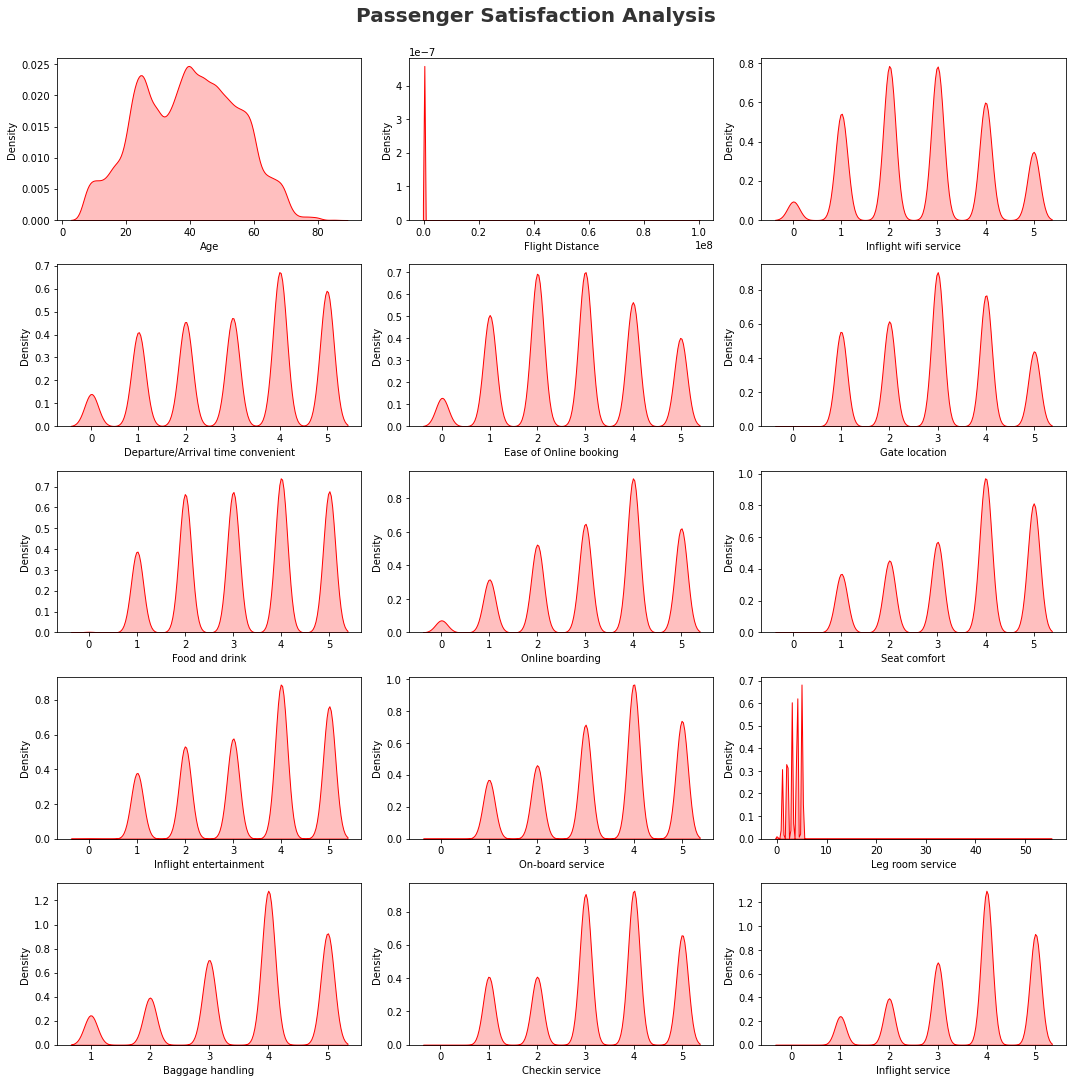

In [41]:
numeric_features = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(15,15))
plt.suptitle('Passenger Satisfaction Analysis',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Observations - Summary:

## * Summary of Data Set
- There are **128,577 Rows** and **24 Columns**.
- **Null Records** are found in:
  - `Age`: **579 nulls**
  - `Food and drink`: **335 nulls**
  - `Online boarding`: **86 nulls**
  - `Arrival Delay in Minutes`: **388 nulls**
- **No duplicate records found**.
- There are **19 Numerical Features**, and they are:
  - `id`, `Age`, `Flight Distance`, `Inflight wifi service`, `Departure/Arrival time convenient`,
    `Ease of Online booking`, `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`,
    `Inflight entertainment`, `On-board service`, `Leg room service`, `Baggage handling`,
    `Checkin service`, `Inflight service`, `Cleanliness`, `Departure Delay in Minutes`,
    `Arrival Delay in Minutes`.
- There are **5 Categorical Features**, and they are:
  - `satisfaction_v2`, `Gender`, `Customer Type`, `Type of Travel`, `Class`.

## * Correlation
- **Correlation between columns** has been calculated. Highly Correlated Features:
  1. `Departure Delay in Minutes` and `Arrival Delay in Minutes` (**0.965**)
  2. `Arrival Delay in Minutes` and `Departure Delay in Minutes` (**0.965**)
    - (We can drop either of these columns due to high correlation.)

## * Imbalanced Data Set
- **No significant imbalance** was found in the data set.

## * Box Plot for Outliers
- **Outliers were found** in:
  - `Flight Distance`
  - `Departure/Arrival time convenient`
  - `Leg room service`
  - `Departure Delay in Minutes`
  - `Arrival Delay in Minutes`.

## * Information about Categorical Columns (Proportion of Categories)
### `satisfaction_v2`
- Neutral or dissatisfied: **56.55%**
- Satisfied: **43.45%**

### `Gender`
- Female: **50.74%**
- Male: **49.26%**

### `Customer Type`
- Loyal Customer: **81.69%**
- Disloyal Customer: **18.31%**

### `Type of Travel`
- Business Travel: **69.09%**
- Personal Travel: **30.91%**

### `Class`
- Business: **48.08%**
- Eco: **44.72%**
- Eco Plus: **7.20%**

## * Univariate, Bivariate, Multivariate Analysis
- Ages of **neutral/dissatisfied passengers** are primarily between **30-50**.
- Ages of **neutral/dissatisfied passengers traveling above 1000 miles** are between **20-30**.
- Passengers traveling above **1000 miles** in **Eco class** are between **20-30** years old.
- Passengers traveling above **1000 miles** in **Business Travel** are also between **20-30** years old.

## * Proportion of Numerical Features
- **Flight Distance** and **Leg Room Services** are **left skewed**.
- **Notable Numerical Features**:
  - **Inflight wifi service**:
    - 2: **24.92%**
    - 3: **24.83%**
    - 4: **19.03%**
    - 1: **17.21%**
    - 5: **11.02%**
    - 0: **3.00%**
  - **Ease of Online Booking**:
    - 3: **23.43%**
    - 2: **23.18%**
    - 4: **18.82%**
    - 1: **16.86%**
    - 5: **13.41%**
    - 0: **4.31%**

### Outlier and NaN columns indepth analysis

    Age:  Mean 39.39, Median 40.0, Mode 39.0
    Food and drink:  Mean 3.2, Median 3.0, Mode 4.0
    Online boarding:  Mean 3.25, Median 3.0, Mode 4.0
    Baggage handling:  Mean 3.63, Median 4.0, Mode 4.0
    Arrival Delay in Minutes:  Mean 15.1, Median 0.0, Mode 0.0
    Departure Delay in Minutes:  Mean 14.73, Median 0.0, Mode 0
    
    - For Age,Food and drink,Online boarding,Baggage handling we can use mean value 
    - for the   NaN values because no outliers are found in these columns
      For Arrival Delay in Minutes because it has outliers we can use mode 
      to fill NaN values